In [ ]:
pip install scikit-learn xgboost

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from datetime import datetime as dt  # Import datetime to calculate time taken

In [ ]:
# Load the breast cancer dataset
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Display the number of records and features.
print('Number of rows: {}'.format(data.shape[0]))
print('Number of columns: {}'.format(data.shape[1]))

Number of rows: 569
Number of columns: 33


In [ ]:
data = data[data.columns[1:32]] #remove unwanted columns from the dataset
data.shape

(569, 31)

In [ ]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Convert target variable to binary (1 for Malignant, 0 for Benign)
y = data["diagnosis"].map({'M': 1, 'B': 0})  # 'M' = Malignant, 'B' = Benign
X = data.drop("diagnosis", axis=1)  # Features (dropping the target column)


In [ ]:
# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Feature selection (Select top 10 features using SelectKBest)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [ ]:
# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(probability=True),  # Enable probability estimation
    'Gaussian Naive Bayes': GaussianNB(),
    #'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}



In [ ]:
# Function to calculate performance metrics and time for each model
def evaluate_model(model, X_train, X_test, y_train, y_test, cv_folds=1):
    # Record start time
    start_time = dt.now()

    # If 1-fold cross-validation (train-test split)
    if cv_folds == 1:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Accuracy (using accuracy_score for 1-fold)
        accuracy = accuracy_score(y_test, y_pred)

        # ROC and AUC
        auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        # Classification Report
        class_report = classification_report(y_test, y_pred)

        # Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Precision and F1 score
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        cv_scores = [accuracy]  # Only one fold, accuracy is the score

    # If 5-fold cross-validation
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')
        accuracy = np.mean(cv_scores)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # ROC and AUC
        auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        # Classification Report
        class_report = classification_report(y_test, y_pred)

        # Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Precision and F1 score
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

    # Record end time
    end_time = dt.now()
    time_taken = end_time - start_time

    return accuracy, auc, precision, f1, fpr, tpr, class_report, conf_matrix, time_taken, cv_scores

In [ ]:
# Store results
results = {}


Evaluating Logistic Regression...


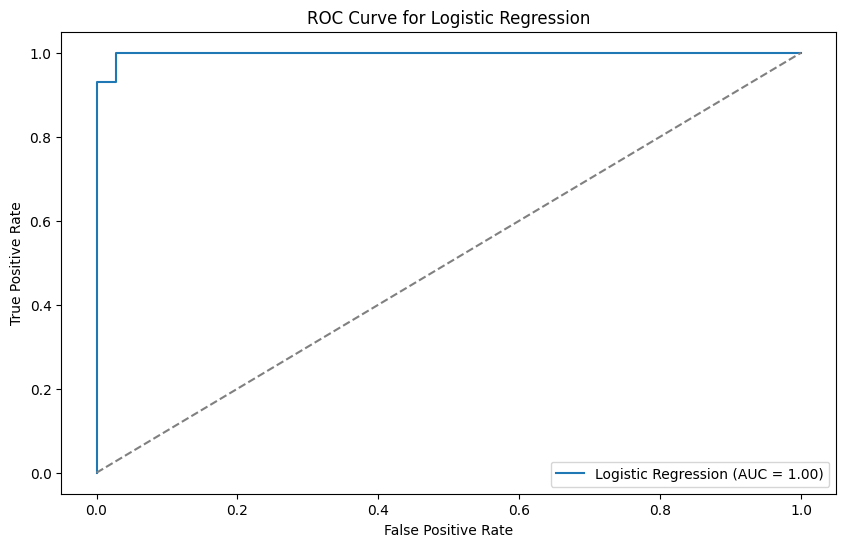

Evaluating K-Nearest Neighbors...


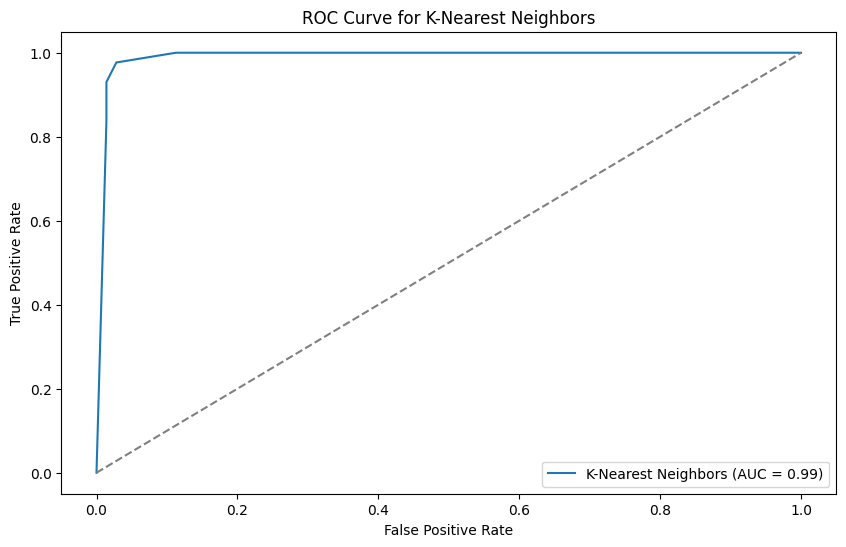

Evaluating Support Vector Classifier...


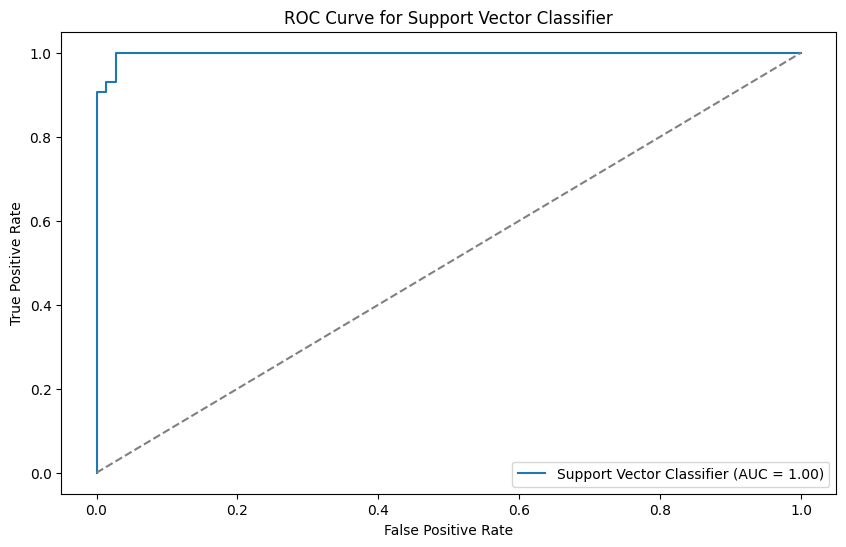

Evaluating Gaussian Naive Bayes...


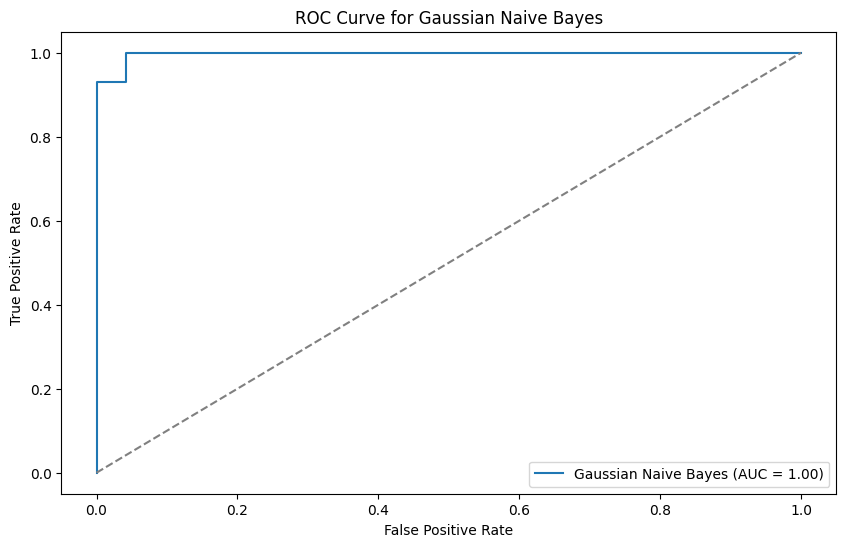

Evaluating Random Forest...


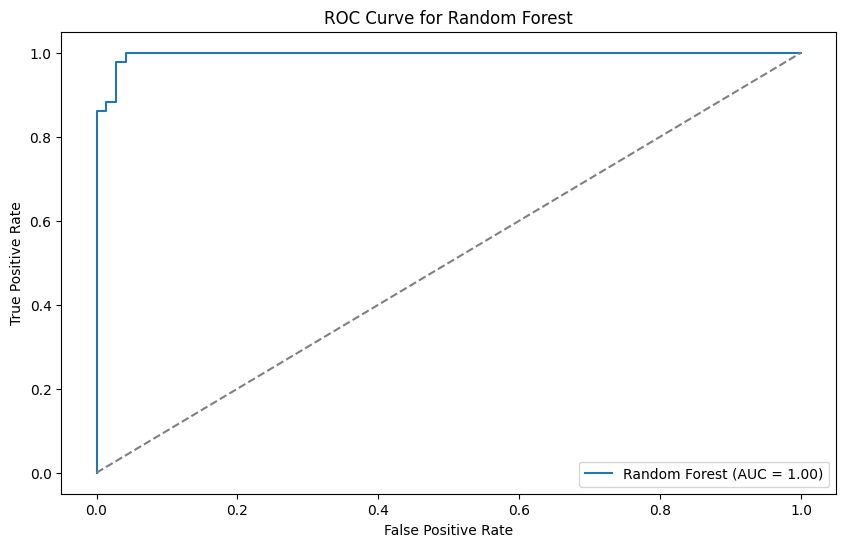

Evaluating Multi-layer Perceptron...


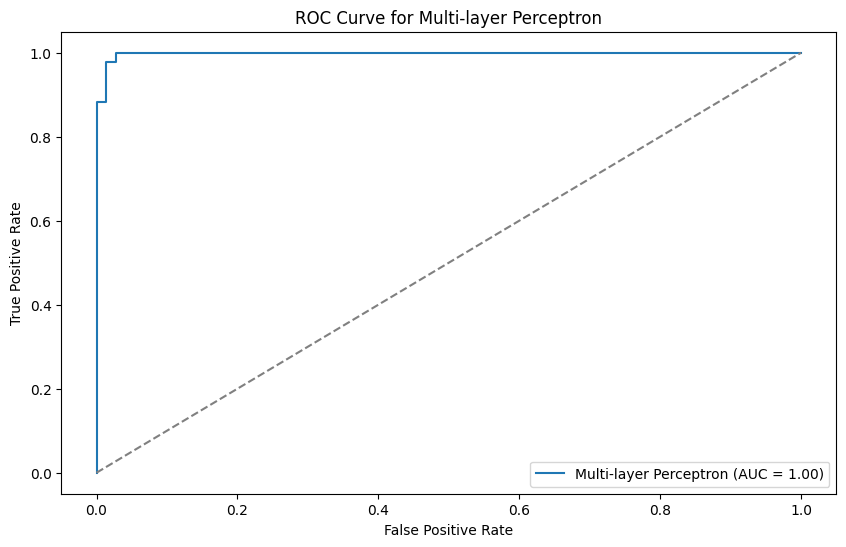

Evaluating AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

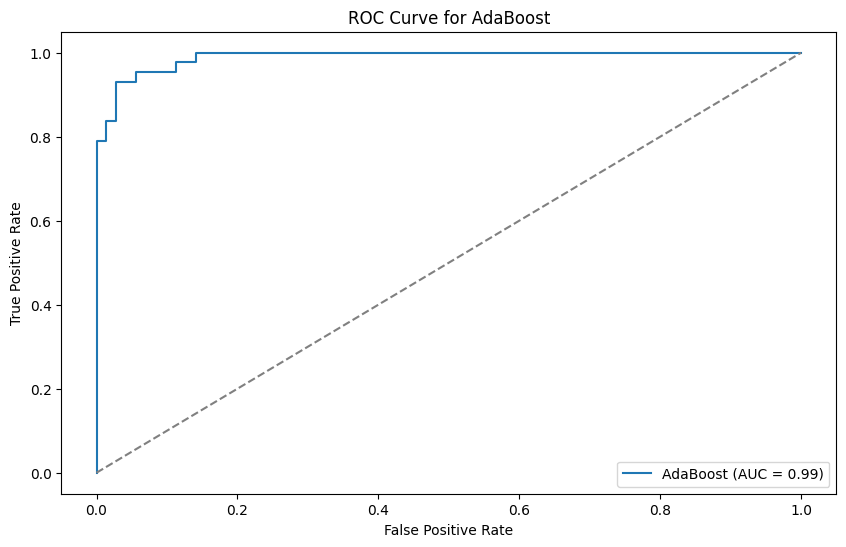

Evaluating XGBoost...


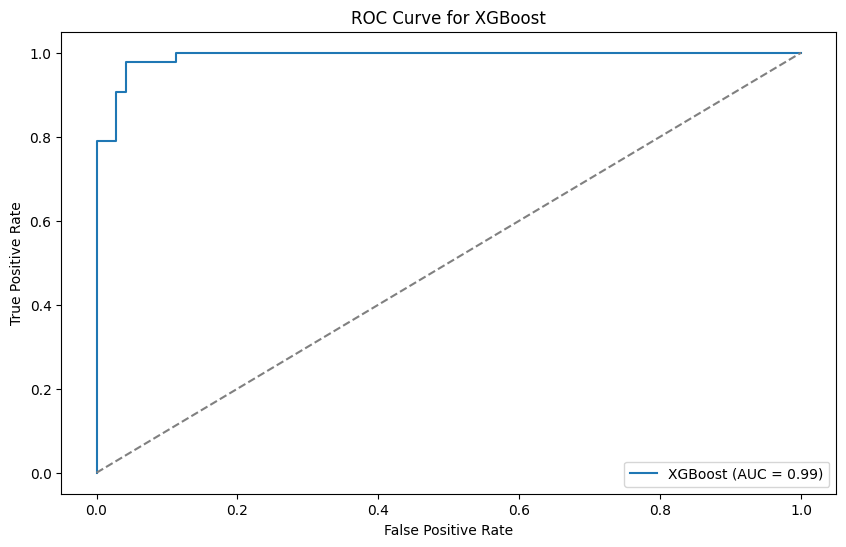

In [ ]:
# Evaluate all models using both 1-fold and 5-fold cross-validation
for model_name, model in classifiers.items():
    print(f"Evaluating {model_name}...")

    # 1-fold Cross Validation
    accuracy_1fold, auc_1fold, precision_1fold, f1_1fold, fpr_1fold, tpr_1fold, class_report_1fold, conf_matrix_1fold, time_taken_1fold, cv_scores_1fold = evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test, cv_folds=1)
    results[model_name] = {
        "1-Fold Accuracy": accuracy_1fold,
        "1-Fold AUC": auc_1fold,
        "1-Fold Precision": precision_1fold,
        "1-Fold F1": f1_1fold,
        "1-Fold FPR": fpr_1fold,
        "1-Fold TPR": tpr_1fold,
        "1-Fold Classification Report": class_report_1fold,
        "1-Fold Confusion Matrix": conf_matrix_1fold,
        "1-Fold Time Taken": time_taken_1fold,
        "1-Fold CV Scores": cv_scores_1fold
    }

    # 5-fold Cross Validation
    accuracy_5fold, auc_5fold, precision_5fold, f1_5fold, fpr_5fold, tpr_5fold, class_report_5fold, conf_matrix_5fold, time_taken_5fold, cv_scores_5fold = evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test, cv_folds=5)
    results[model_name].update({
        "5-Fold Accuracy": accuracy_5fold,
        "5-Fold AUC": auc_5fold,
        "5-Fold Precision": precision_5fold,
        "5-Fold F1": f1_5fold,
        "5-Fold FPR": fpr_5fold,
        "5-Fold TPR": tpr_5fold,
        "5-Fold Classification Report": class_report_5fold,
        "5-Fold Confusion Matrix": conf_matrix_5fold,
        "5-Fold Time Taken": time_taken_5fold,
        "5-Fold CV Scores": cv_scores_5fold
    })

    # Plot ROC curve for 5-fold cross-validation
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_5fold, tpr_5fold, label=f'{model_name} (AUC = {auc_5fold:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
# Initialize lists to store the performance metrics for each model
model_names = []
metrics_1fold = []
metrics_5fold = []


In [ ]:
# Extracting performance metrics for each model
for model_name, metrics in results.items():
    # Add model name
    model_names.append(model_name)

    # 1-Fold metrics
    metrics_1fold.append([
        metrics['1-Fold Accuracy'],
        metrics['1-Fold AUC'],
        metrics['1-Fold Precision'],
        metrics['1-Fold F1'],
        metrics['1-Fold Time Taken']
    ])

    # 5-Fold metrics
    metrics_5fold.append([
        metrics['5-Fold Accuracy'],
        metrics['5-Fold AUC'],
        metrics['5-Fold Precision'],
        metrics['5-Fold F1'],
        metrics['5-Fold Time Taken']
    ])


In [ ]:
# Creating DataFrame for better readability and structure
df = pd.DataFrame({
    'Model Name': model_names,
    '1-Fold Accuracy': [x[0] for x in metrics_1fold],
    '1-Fold AUC': [x[1] for x in metrics_1fold],
    '1-Fold Precision': [x[2] for x in metrics_1fold],
    '1-Fold F1': [x[3] for x in metrics_1fold],
    '1-Fold Time Taken': [x[4] for x in metrics_1fold],
    '5-Fold Accuracy': [x[0] for x in metrics_5fold],
    '5-Fold AUC': [x[1] for x in metrics_5fold],
    '5-Fold Precision': [x[2] for x in metrics_5fold],
    '5-Fold F1': [x[3] for x in metrics_5fold],
    '5-Fold Time Taken': [x[4] for x in metrics_5fold]
})


In [ ]:
# Print the DataFrame in a nice tabular format
print(df)

                  Model Name  1-Fold Accuracy  1-Fold AUC  1-Fold Precision  \
0        Logistic Regression         0.973684    0.998035          0.954545   
1        K-Nearest Neighbors         0.973684    0.990174          0.954545   
2  Support Vector Classifier         0.964912    0.997707          0.975610   
3       Gaussian Naive Bayes         0.973684    0.997052          1.000000   
4              Random Forest         0.956140    0.993285          0.952381   
5     Multi-layer Perceptron         0.973684    0.998035          0.954545   
6                   AdaBoost         0.956140    0.989519          0.952381   
7                    XGBoost         0.938596    0.991156          0.950000   

   1-Fold F1      1-Fold Time Taken  5-Fold Accuracy  5-Fold AUC  \
0   0.965517 0 days 00:00:00.053306         0.949451    0.998035   
1   0.965517 0 days 00:00:00.051921         0.931868    0.990174   
2   0.952381 0 days 00:00:00.064129         0.940659    0.997707   
3   0.963855 0 d

In [ ]:
# Identify best model based on AUC (5-Fold)
best_model_name_5fold = max(results, key=lambda x: results[x]["5-Fold AUC"])
print(f"\nBest Model Based on 5-Fold AUC: {best_model_name_5fold}")



Best Model Based on 5-Fold AUC: Logistic Regression


In [ ]:
# Identify best model based on AUC (1-Fold)
best_model_name_1fold = max(results, key=lambda x: results[x]["1-Fold AUC"])
print(f"\nBest Model Based on 1-Fold AUC: {best_model_name_1fold}")


Best Model Based on 1-Fold AUC: Logistic Regression


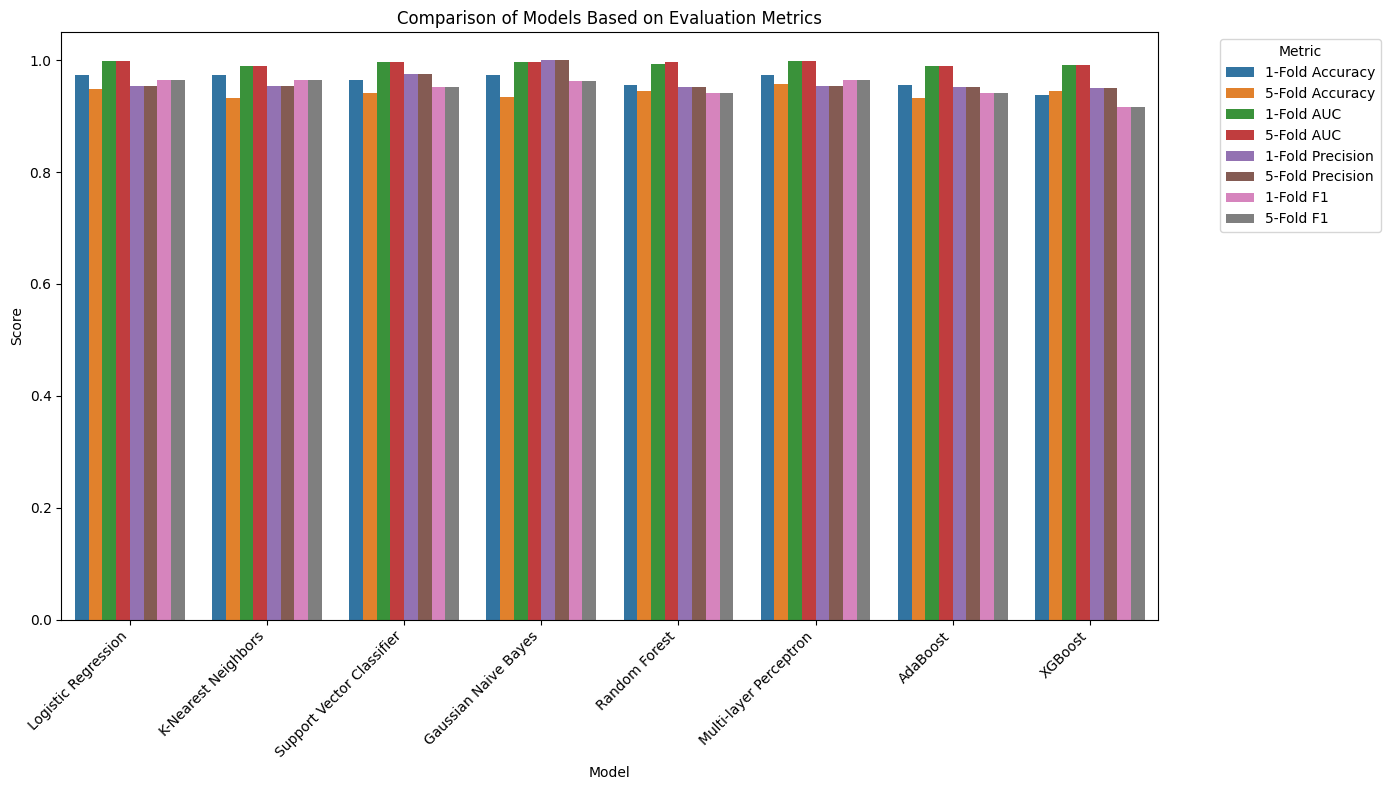

In [58]:
import seaborn as sns

# Function to create bar plots for evaluation metrics
def plot_metrics(df):
    # Metrics for 1-Fold and 5-Fold
    metrics = ['1-Fold Accuracy', '5-Fold Accuracy', '1-Fold AUC', '5-Fold AUC',
               '1-Fold Precision', '5-Fold Precision', '1-Fold F1', '5-Fold F1']

    # Reshape the DataFrame for plotting
    df_melted = df.melt(id_vars="Model Name", value_vars=metrics,
                        var_name="Metric", value_name="Score")

    plt.figure(figsize=(14, 8))
    sns.barplot(data=df_melted, x="Model Name", y="Score", hue="Metric")
    plt.xticks(rotation=45, ha="right")
    plt.title("Comparison of Models Based on Evaluation Metrics")
    plt.ylabel("Score")
    plt.xlabel("Model")
    plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# Plot the evaluation metrics
plot_metrics(df)

